<a href="https://colab.research.google.com/github/khayes39/firstrepo/blob/main/HW3_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB



drive.mount('/content/drive')

file_path = '/content/drive/My Drive/ML/Data_sets/cancer.csv'
cancer = pd.DataFrame(pd.read_csv(file_path))


print(cancer.shape)

cancer.head()



Mounted at /content/drive
(569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [2]:

#binary map
def binary_map(x):

    return x.map({'M': 1, 'B': 0})

varlist = ["diagnosis"]

cancer[varlist] = cancer[varlist].apply(binary_map)

cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
#splitting the data set into train and test sets 2 for x 2 for y



x_vars = np.arange(2, 30, 1)
print(x_vars)
X_vals = cancer.iloc[:, x_vars].values
Y_vals = cancer.iloc[:, 1].values

print(X_vals)


np.random.seed(0)
x_train, x_test, y_train, y_test = train_test_split(X_vals, Y_vals, train_size = 0.8, test_size = 0.2, random_state = 100)






[ 2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
 26 27 28 29]
[[1.799e+01 1.038e+01 1.228e+02 ... 6.656e-01 7.119e-01 2.654e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.866e-01 2.416e-01 1.860e-01]
 [1.969e+01 2.125e+01 1.300e+02 ... 4.245e-01 4.504e-01 2.430e-01]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 3.094e-01 3.403e-01 1.418e-01]
 [2.060e+01 2.933e+01 1.401e+02 ... 8.681e-01 9.387e-01 2.650e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 6.444e-02 0.000e+00 0.000e+00]]


In [4]:
#standardization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()


x_train_std = x_train
x_test_std = x_test

x_train_std = scaler.fit_transform(x_train)
x_test_std = scaler.transform(x_test)



In [13]:
#doing PCA test

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x_train_std)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
principalDf.head()

,principal component 1,principal component 2
0,-3.450117,-1.816204
1,-1.915075,-0.756899
2,5.914093,5.588923
3,-2.226761,-0.234964
4,-2.500075,-1.226583


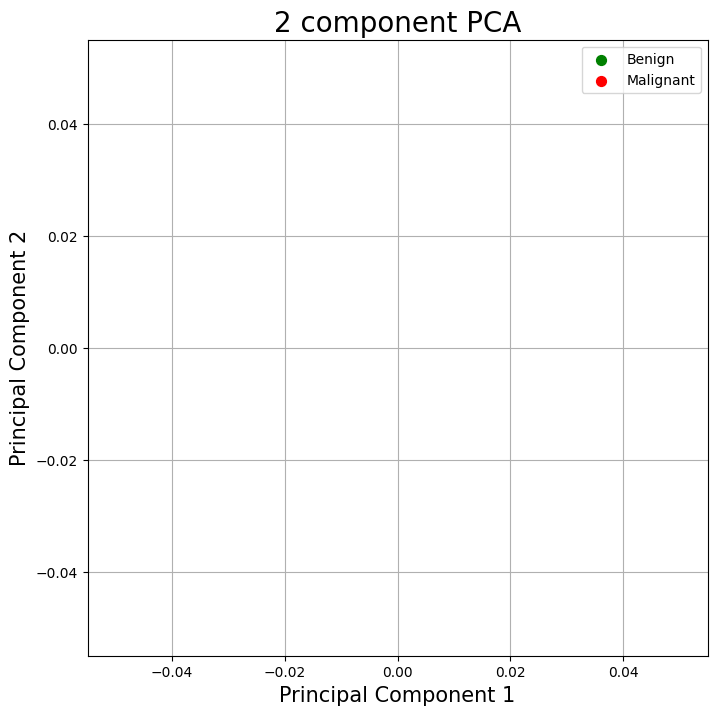

In [14]:
finalDf = pd.concat([principalDf, cancer[['diagnosis']]], axis = 1)
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Benign','Malignant']
colors = ['g', 'r']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['diagnosis'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()